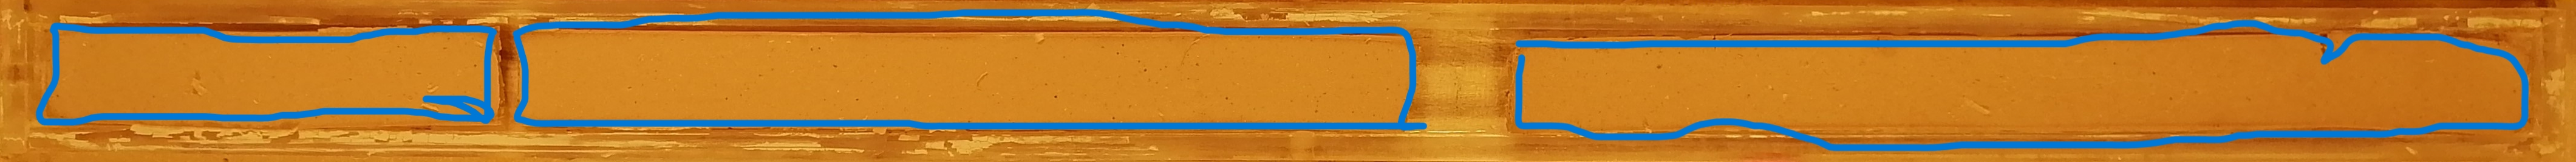

-1

In [47]:
import cv2
from google.colab.patches import cv2_imshow
# read the image
image = cv2.imread('90_A_5_1.jpg')

crop_img = image[200:500, 10:4300]
c1=image[55:215,1800:2000]
c2=image[40:260,2155:4100]
cv2_imshow(crop_img)
#cv2_imshow(c1)
#cv2_imshow(c2)
cv2.waitKey(0)


In [48]:
image=crop_img

In [49]:
img_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

In [50]:
import numpy as np

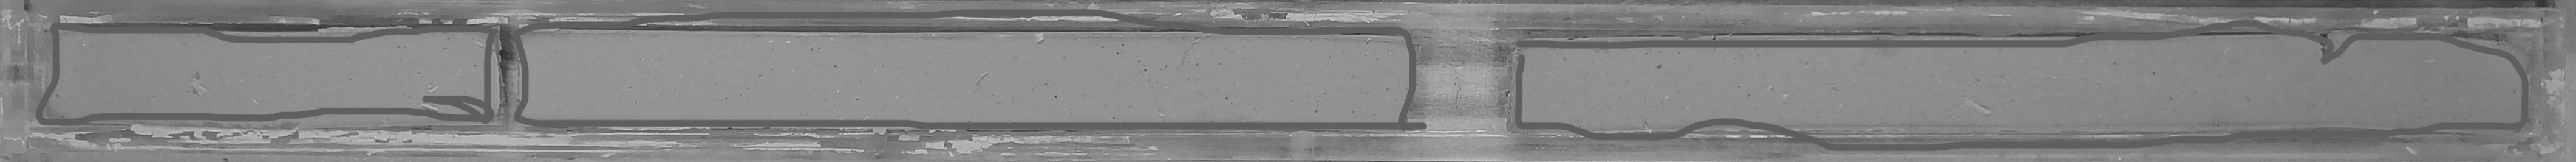

In [51]:
from google.colab.patches import cv2_imshow
# ret, thresh = cv2.threshold(img_gray, 150, 255, cv2.THRESH_BINARY)
# thresh = cv2.erode(thresh, np.ones((8, 0), "uint8"))
# thresh = cv2.dilate(thresh, np.ones((16, 0), "uint8"))
# visualize teh binary image
cv2_imshow( img_gray)
cv2.waitKey(0)

cv2.destroyAllWindows()

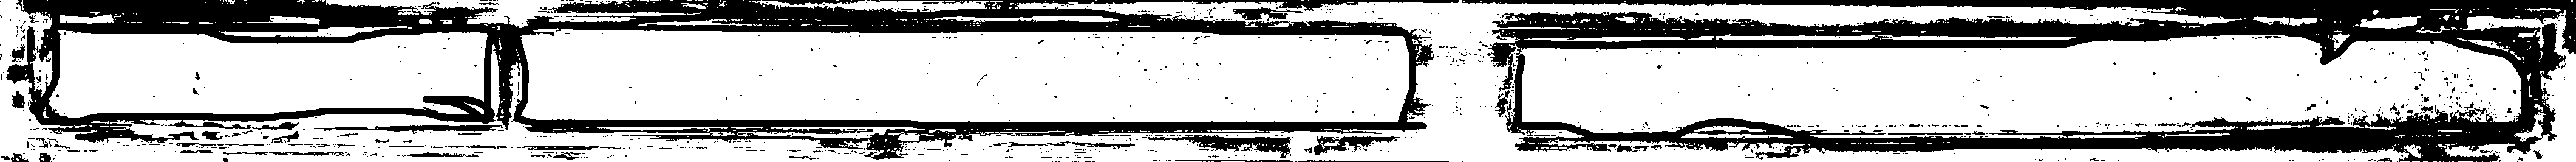

In [52]:
img1 = img_gray.copy()
for i in range(img1.shape[0]):
  for j in range(img1.shape[1]):
    if img1[i][j] <= 124:
      img1[i][j] = 0
    else:
      img1[i][j] = 255
cv2_imshow(img1)

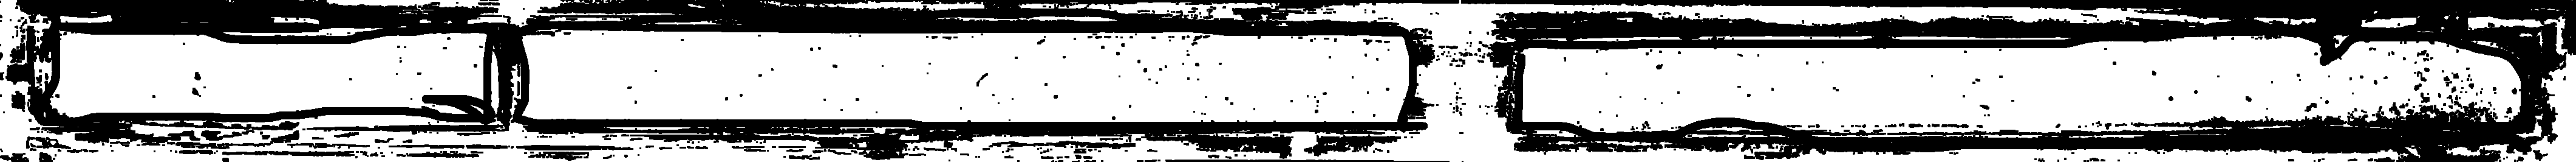

In [56]:
ram = cv2.fastNlMeansDenoising(img1,None,10,7,21)
cv2_imshow(ram)

In [54]:
img1 = cv2.erode(ram, np.ones((16, 0), "uint8"))
# img1 = cv2.dilate(img1, np.ones((16, 0), "uint8"))
# cv2_imshow(img1)

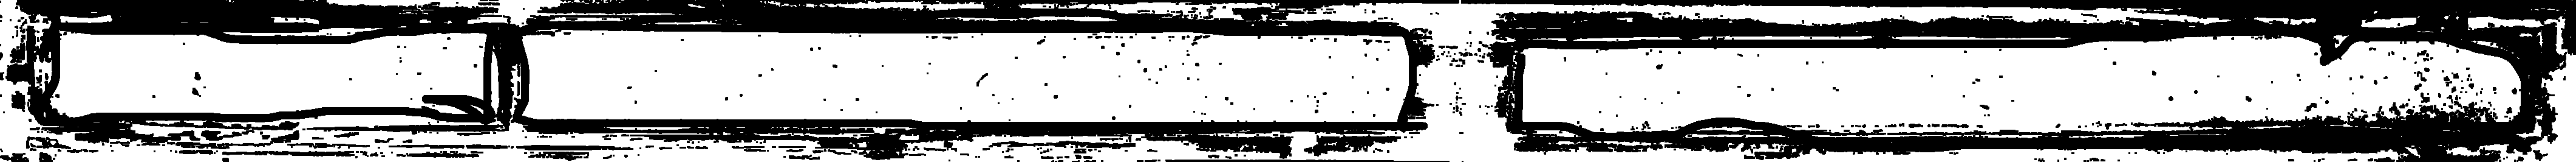

In [55]:
cv2_imshow(img1)

208807.5


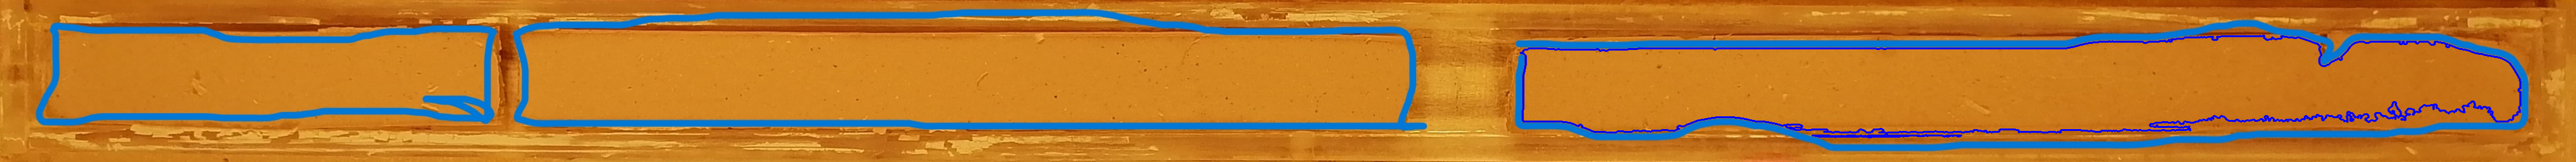

81860.5


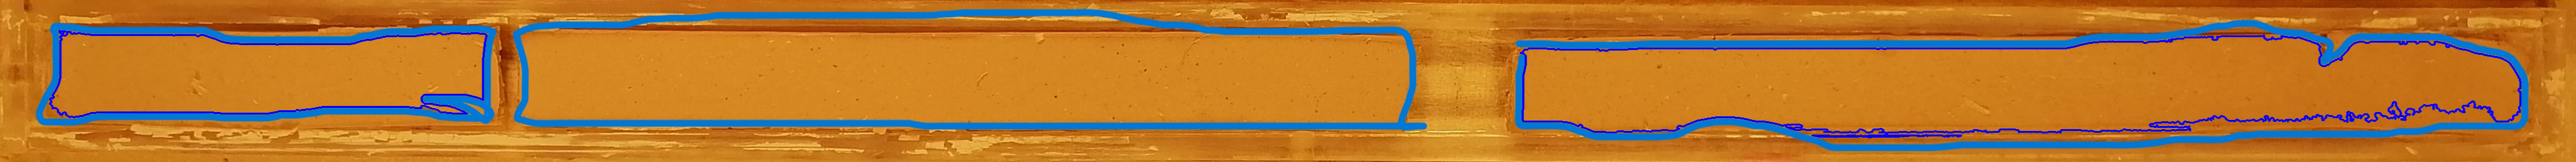

205919.0


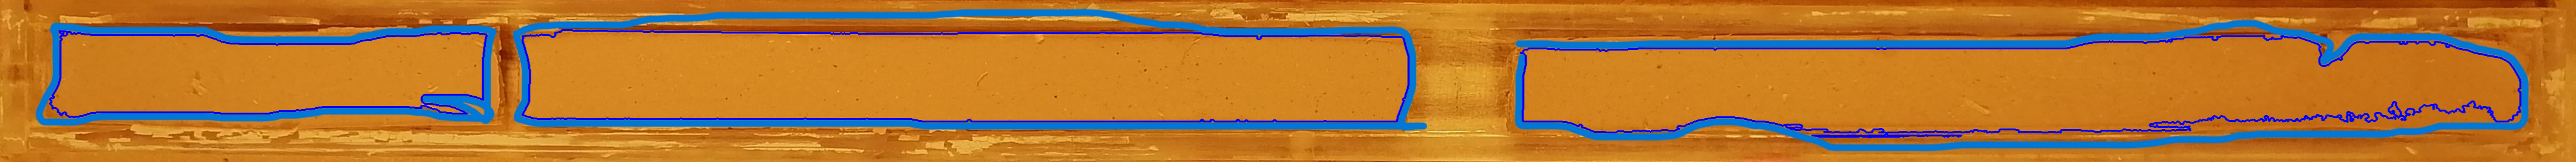

188164.5


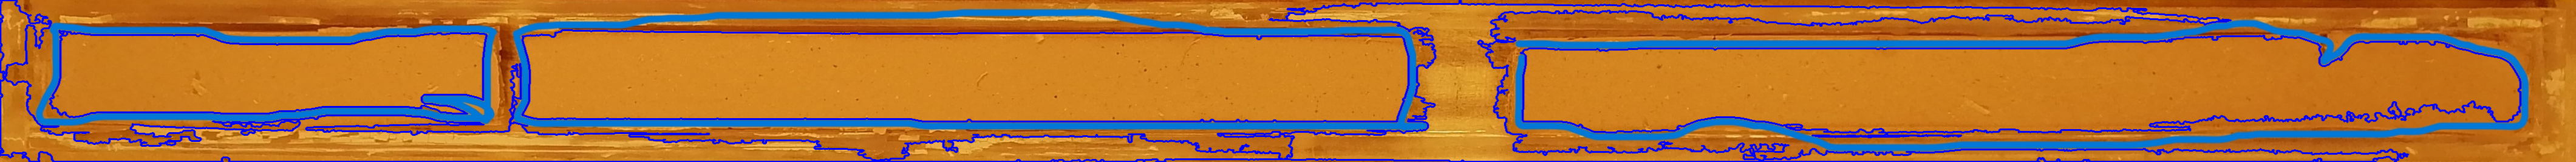

4


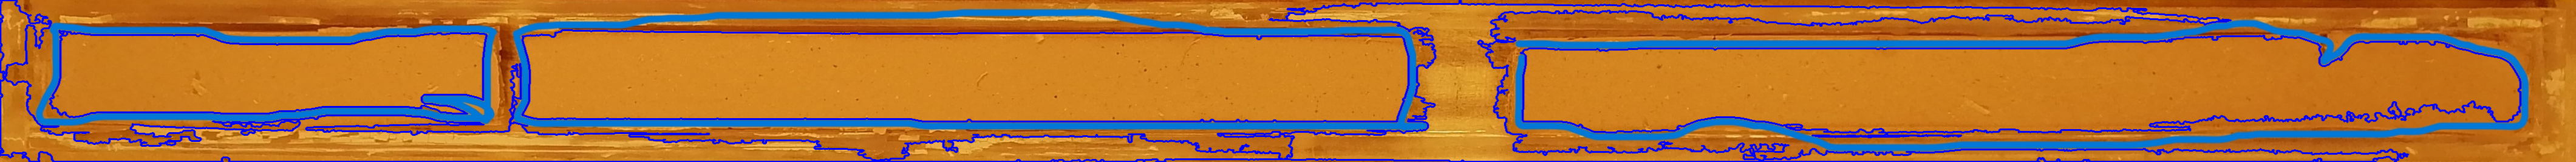

In [59]:
contours, hierarchy = cv2.findContours(image=img1, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
l=[]
#print(contours)                            
# draw contours on teh original image
image_copy = image.copy()
# cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
for i, coun in enumerate(contours):
  c=cv2.contourArea(coun)
  if c>10000:
    l.append(coun)
    print(c)
    cv2.drawContours(image=image_copy, contours=coun, contourIdx=-1, color=((i+1)*128,0, 0), thickness=2, lineType=cv2.LINE_AA)
    cv2_imshow(image_copy)
contours=tuple(l)
print(len(l))
#cv2.drawContours(image=image_copy, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
#print(contours)         
# see teh results
cv2_imshow(image_copy)
cv2.waitKey(0)
cv2.imwrite('contours_none_image1.jpg', image_copy)
cv2.destroyAllWindows()

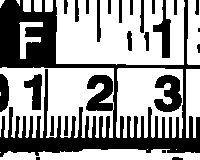

0


In [25]:
import cv2
c=0
for i, cnt in enumerate(contours):
  
   M = cv2.moments(cnt)
   area = cv2.contourArea(cnt)
   if M['m00'] != 0.0 and area >10000:
      x, y, w, h = cv2.boundingRect(cnt)
      cv2.rectangle(cnt,(x,y), (x+w,y+h), (255,0,0), 5)
      #cv2_waitkey(2)
      x1 = int(M['m10']/M['m00'])
      y1 = int(M['m01']/M['m00'])
      c=c+area
      print(area)
      cv2.putText(img1, f'{area}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
cv2_imshow(img1)
   
  #  if area>10000:
  #    c=c+area
  #    print(area)
  #    cv2.putText(img1, f'{area}', (x1, y1), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)
  #  #print(f'Area of contour {i+1}:', area)

# cv2_imshow(img1)
print(c)

In [26]:
195839
print(772117*0.026*0.026)
#print(143632*0.26*100/195839)

521.9510919999999
